In [116]:
import matplotlib.pyplot as plt

# Set this variable to True to run an interactive simulator. This will not work on CoCalc.
interactive = False  
#comment out 'matplotlib inline' if using the GUI
%matplotlib inline 

if interactive:
    matplotlib.use('TkAgg')
import pylab
import numpy as np
from collections import Counter


class Voter:
    
    def __init__(self, update_type, interactive):
    
        self.interactive = interactive
        self.time = 0
        self.update_type = update_type
        
        self.g = nx.karate_club_graph()
        self.g.pos = nx.spring_layout(self.g)
        for i in self.g.nodes:
            self.g.nodes[i]['state'] = 1 if np.random.uniform() < .5 else 0
        
    def initialize(self):
        self.time = 0
        self.g = nx.karate_club_graph()
        self.g.pos = nx.spring_layout(self.g)
        for i in self.g.nodes:
            self.g.nodes[i]['state'] = 1 if np.random.uniform() < .5 else 0

    def observe(self):
        
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure

        nx.draw(self.g, vmin = 0, vmax = 1,
                node_color = [self.g.nodes[i]['state'] for i in self.g.nodes],
                cmap="Set3",
                pos = self.g.pos,
                labels = nx.get_node_attributes(self.g, 'state'))
        
        if not self.interactive:
            pylab.show()

    def update(self):
        
        if self.update_type == 'pull':
            '''
            First, a “listener” node is randomly chosen from the network, and
            then a “speaker” node is randomly chosen from the listener’s neighbors.
            '''
            listener = np.random.choice(list(self.g.nodes))
            speaker = np.random.choice(list(self.g.neighbors(listener)))
            
        if self.update_type == 'push':
            '''
            First, a “speaker” node is randomly chosen from the network,
            and then a “listener” node is randomly chosen from the speaker’s neighbors.
            '''
            speaker = np.random.choice(list(self.g.nodes))
            listener = np.random.choice(list(self.g.neighbors(speaker)))
            
        if self.update_type == 'edge':
            '''
            First, an edge is randomly chosen from the network,
            and then the two endpoints (nodes) of the edge are randomly assigned to be a
            “speaker” and a “listener.”
            '''
            index = np.random.choice(len(list(self.g.edges)))
            edge = list(self.g.edges)[index]
            if np.random.uniform() < .5:
                speaker,listener = edge[0],edge[1]
            else:
                speaker,listener = edge[1],edge[0]
                
        self.g.nodes[listener]['state'] = self.g.nodes[speaker]['state']
        self.time += 1
        
        
    def check_homo(self):
        state_dct = Counter(nx.get_node_attributes(self.g, 'state').values())
        if len(state_dct) == 1: #if there's only a single state recorded in the dict:
            #print(self.time)
            return self.time
        return False


Initial state:


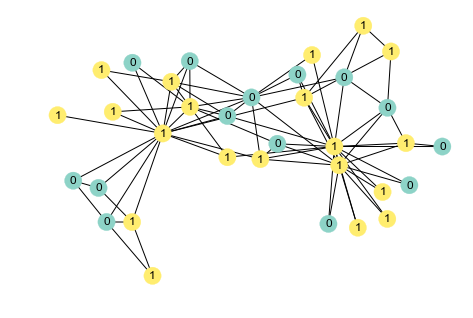

Next 5 states:


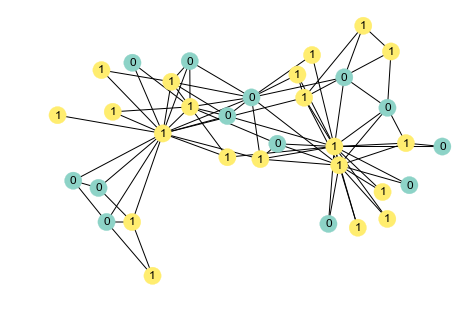

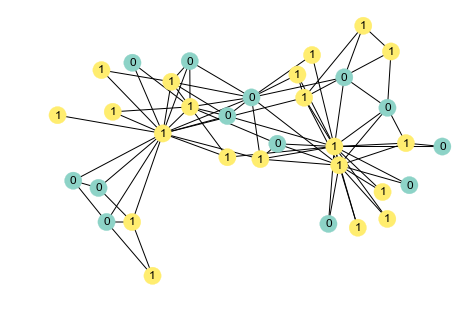

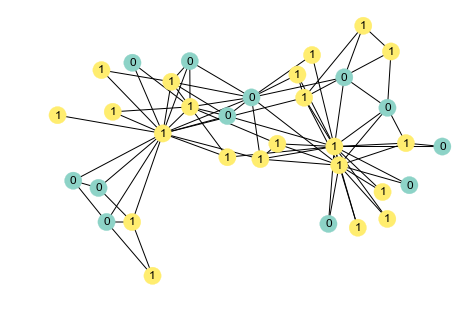

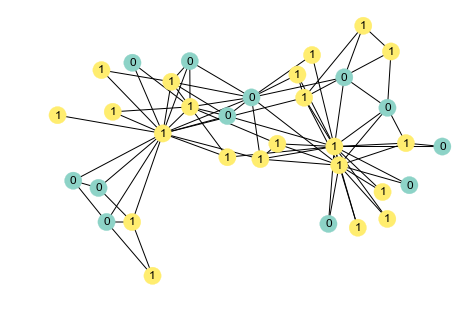

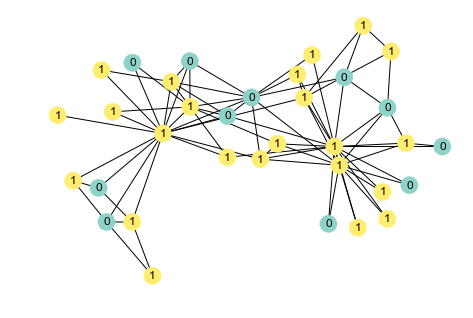


After 100 steps:


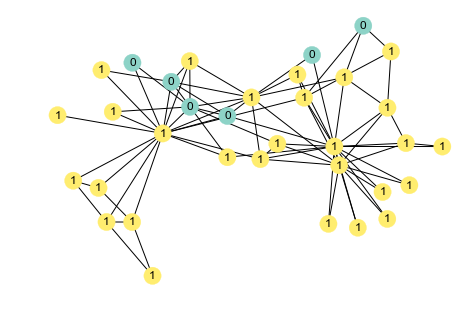

In [118]:

sim = Voter(update_type='pull',interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    pycxsimulator.GUI().start(func=[sim.initialize, sim.observe, sim.update])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.observe()

    print('Next 5 states:')
    for i in range(5):
        sim.update()
        sim.observe()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.update()
    sim.observe()
    
    

In [119]:
def get_consensus_time(update_type,n_sim = 100):

    consensus_time = []
    
    for i in range(n_sim):
        sim = Voter(update_type, interactive=False)
        sim.initialize()
        while not sim.check_homo():
            sim.update()
        time = sim.check_homo()
        consensus_time.append(time)
        
    return consensus_time

pull_time = get_consensus_time('pull')
push_time = get_consensus_time('push')
edge_time = get_consensus_time('edge')

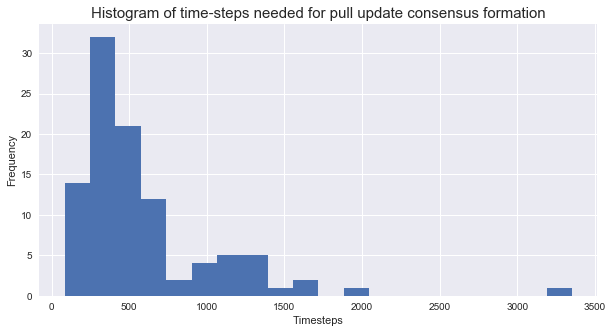

Time-steps stats for pull update consensus formation.
Mean: 587.72, max: 3353, min: 84


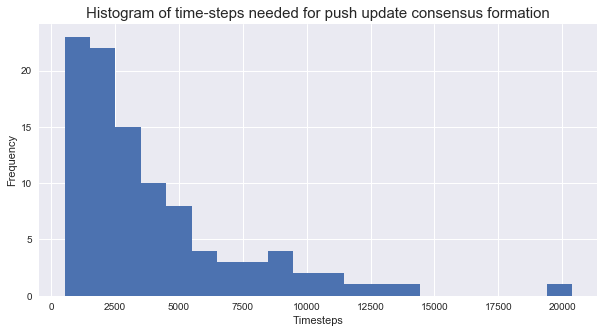

Time-steps stats for push update consensus formation.
Mean: 3965.27, max: 20387, min: 521


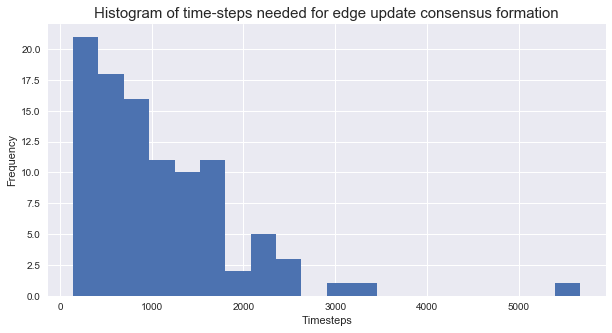

Time-steps stats for edge update consensus formation.
Mean: 1090.74, max: 5674, min: 141


In [127]:
import seaborn as sns
sns.set()

def plot_time(update_type,consensus_time):

    plt.figure(figsize=(10,5))
    plt.title(f'Histogram of time-steps needed for {update_type} update consensus formation',size=15)
    plt.xlabel("Timesteps")
    plt.ylabel("Frequency")
    plt.hist(consensus_time, bins=20)
    plt.show()
    
    print(f"Time-steps stats for {update_type} update consensus formation.")
    print(f"Mean: {np.mean(consensus_time)}, max: {max(consensus_time)}, min: {min(consensus_time)}")
    
plot_time('pull',pull_time)
plot_time('push',push_time)
plot_time('edge',edge_time)